# Topics in Econ HW1

In [185]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Part 1: ESG

## Q1

(a) (5 points) In your own words, explain what the unadjusted greenness score, Git, measures. Make sure to mention why we need to include E weight.

The unadjusted greenness score, $G_{i,t}$, provides a holistic measure of a company's environmental performance by taking into account both its particular environmental practices and the overarching context of its industry. This measure is derived using the company's environmental score, $E_{score_{i,t}}$, and the environmental significance of its industry, $E_{weight_{i,t}}$, as determined by the MSCI ratings, using the most recent data available.

A key component of this calculation is how the company's environmental score stands relative to a perfect score. The expression $10 - E_{score_{i,t}}$ computes the difference between the company's score and the ideal score of 10, giving us an idea of the company's environmental shortcomings. This deviation is then weighted by $E_{weight_{i,t}}$, which signifies the environmental relevance or impact of that specific industry. The multiplication of these two values produces a measure of the firm's "brownness" — essentially gauging its deviation from eco-friendly behavior in relation to its industry's environmental footprint. However, to make this metric more intuitive, its sign is inverted, with the goal of denoting "greenness." Consequently, a higher value implies more eco-friendly practices, especially in comparison to the industry's environmental consequences.

The integration of $E_{weight}$ is paramount for a nuanced analysis. Without it, two firms from disparate sectors but with identical $E_{score}$ values could be perceived as equally green, which could be misleading. By incorporating $E_{weight}$, the metric offers a context-sensitive perspective on a company's greenness, effectively situating its environmental performance within the inherent environmental implications of its industry.


(b) (5 points) Why does the paper focus on the adjusted greenness score?

The paper emphasizes the adjusted greenness score, $gi,t$, to capture a company's environmental stance in relation to the overarching market. By subtracting the market's value-weighted average greenness, $Gt$, from an individual firm's score, the adjusted metric, $gi,t$, highlights how green or brown a firm stands compared to the market's mean. This method mitigates the influence of absolute greenness values and fosters a nuanced comparison across firms, thus facilitating a precise understanding of a company's environmental performance against its peers.


## Q2. Use the description in Section 4 of the paper to replicate Figure 3

- Following equations 1 and 2 of P ́astor et al. (2022), compute the firm-level greenness measure, gi,t. 
- In order to do the value-weighting (this will also apply when you construct the GMB portfolio), use the fields PRC (price) and SHROUT (shares outstanding) to compute the market cap of each firm at each date. 
- Then, G ̄t is the market cap weighted average.

## $G_{i,t-1} = -(10 - E\_score_{i,t-1}) \times \frac{E\_weight_{i,t-1}}{100}$

## $g_{i,t} = G_{i,t} - \overline{G}_t$

In [493]:
df1 = pd.read_csv('MSCI_sample.CSV') 
df1['G'] = -(10-df1['ENVIRONMENTAL_PILLAR_SCORE'])*df1['ENVIRONMENTAL_PILLAR_WEIGHT']/100
df1['MKT_CAP'] = df1['PRC'] * df1['SHROUT']
df1['Weighted_G'] = df1['G'] * df1['MKT_CAP']
monthly_weighted_avg_G = df1.groupby(df1['AS_OF_DATE']).apply(lambda x: (x['Weighted_G'].sum() / x['MKT_CAP'].sum()))
df1['Monthly_Weighted_Avg_G'] = df1['AS_OF_DATE'].map(monthly_weighted_avg_G)
df1['g'] = df1['G'] - df1['Monthly_Weighted_Avg_G']

In [494]:
# Convert the columns to numeric data types
df1['RET'] = pd.to_numeric(df1['RET'], errors='coerce')
df1['MKT_CAP'] = pd.to_numeric(df1['MKT_CAP'], errors='coerce')

# Replace NaN values with 0
df1[['RET', 'MKT_CAP']] = df1[['RET', 'MKT_CAP']].fillna(0)

In [495]:
df1

,ISSUER_NAME,ISSUERID,AS_OF_DATE,IVA_INDUSTRY,INDUSTRY_ADJUSTED_SCORE,WEIGHTED_AVERAGE_SCORE,ENVIRONMENTAL_PILLAR_SCORE,ENVIRONMENTAL_PILLAR_WEIGHT,SOCIAL_PILLAR_SCORE,SOCIAL_PILLAR_WEIGHT,GOVERNANCE_PILLAR_SCORE,GOVERNANCE_PILLAR_WEIGHT,RET,PRC,SHROUT,G,MKT_CAP,Weighted_G,Monthly_Weighted_Avg_G,g
0,"QEP Resources, Inc.",IID000000002231971,2012-01-01,Oil & Gas Exploration & Production,4.55,6.00,4.70,56.00,7.40,22.00,7.90,22.00,-0.022526,NaN,242566.0,-2.96800,0.000000e+00,NaN,-2.287488,-0.680512
1,IAMGOLD Corporation,IID000000002169868,2012-01-01,Metals and Mining - Precious Metals,4.66,5.97,6.12,55.25,6.14,25.00,5.36,19.75,0.056151,3.48,477033.0,-2.14370,1.660075e+06,-3.558702e+06,-2.287488,0.143788
2,Las Vegas Sands Corp.,IID000000002173531,2012-01-01,Casinos & Gaming,0.00,5.89,5.29,38.00,6.70,32.00,5.80,30.00,0.149310,38.87,763990.0,-1.78980,2.969629e+07,-5.315042e+07,-2.287488,0.497688
3,Honeywell International Inc.,IID000000002127578,2012-01-01,Aerospace & Defense,5.64,5.83,4.09,45.00,6.60,25.00,7.80,30.00,0.067893,194.58,685894.0,-2.65950,1.334613e+08,-3.549402e+08,-2.287488,-0.372012
4,"Staples, Inc.",IID000000002145070,2012-01-01,Specialty Retail,6.10,5.81,7.02,24.65,5.42,70.79,5.30,4.56,0.053276,NaN,656713.0,-0.73457,0.000000e+00,NaN,-2.287488,1.552918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49332,"ANALOG DEVICES, INC.",IID000000002157388,2021-12-01,Semiconductors & Semiconductor Equipment,5.20,5.30,6.30,35.00,6.10,30.00,3.50,35.00,-0.021026,180.25,525331.0,-1.29500,9.469091e+07,-1.226247e+08,-0.755357,-0.539643
49333,AMERICAN WOODMARK CORPORATION,IID000000002157284,2021-12-01,Building Products,3.90,4.90,3.60,45.00,5.70,22.00,6.10,33.00,0.057755,61.64,16570.0,-2.88000,1.021375e+06,-2.941559e+06,-0.755357,-2.124643
49334,AMERICAN VANGUARD CORPORATION,IID000000002157281,2021-12-01,Specialty Chemicals,2.00,3.20,3.10,55.00,0.00,12.00,4.50,33.00,0.146750,14.31,30934.0,-3.79500,4.426655e+05,-1.679916e+06,-0.755357,-3.039643
49335,BANK OF MARIN BANCORP,IID000000002159126,2021-12-01,Banks,3.30,3.30,0.00,13.00,3.10,54.00,5.10,33.00,0.074769,34.64,16013.0,-1.30000,5.546903e+05,-7.210974e+05,-0.755357,-0.544643


In [496]:
# Define a function to categorize based on greenness score within each group
def categorize_by_score(group):
    group['Greenness_Category'] = pd.qcut(group['g'], q=3, labels=['brown', 'neutral', 'green'])
    return group

# Apply the function to each date's group
df_q2 = df1.groupby('AS_OF_DATE').apply(categorize_by_score)

In [497]:
def value_weighted_return(group):
    group['Green_Return'] = (group[group['Greenness_Category'] == 'green']['RET'] * group[group['Greenness_Category'] == 'green']['MKT_CAP']).sum() / group[group['Greenness_Category'] == 'green']['MKT_CAP'].sum()
    group['Brown_Return'] = (group[group['Greenness_Category'] == 'brown']['RET'] * group[group['Greenness_Category'] == 'brown']['MKT_CAP']).sum() / group[group['Greenness_Category'] == 'brown']['MKT_CAP'].sum()
    return group

df_q2 = df_q2.drop(columns='AS_OF_DATE').reset_index().groupby('AS_OF_DATE').apply(value_weighted_return)

In [498]:
RET_df = df_q2[['AS_OF_DATE', 'Green_Return', 'Brown_Return']].drop_duplicates().set_index('AS_OF_DATE')['2012-11-01':'2020-12-01']
RET_df['Cumulative_Green_Return'] = (1 + RET_df['Green_Return']).cumprod() - 1
RET_df['Cumulative_Brown_Return'] = (1 + RET_df['Brown_Return']).cumprod() - 1
RET_df = RET_df * 100
RET_df.index = pd.to_datetime(RET_df.index) 

In [499]:
RET_df

,Green_Return,Brown_Return,Cumulative_Green_Return,Cumulative_Brown_Return
AS_OF_DATE,,,,
2012-11-01,-0.047331,-0.999096,-0.047331,-0.999096
2012-12-01,4.330804,-0.012535,4.281423,-1.011506
2013-01-01,8.987899,4.691743,13.654132,3.632780
2013-02-01,1.109147,0.305150,14.914723,3.949015
2013-03-01,3.800664,3.462312,19.282245,7.548054
...,...,...,...,...
2020-08-01,12.802990,1.576774,253.750473,26.880454
2020-09-01,-6.689024,-3.537789,230.088018,22.391691
2020-10-01,-1.480247,-0.700744,225.201901,21.534038


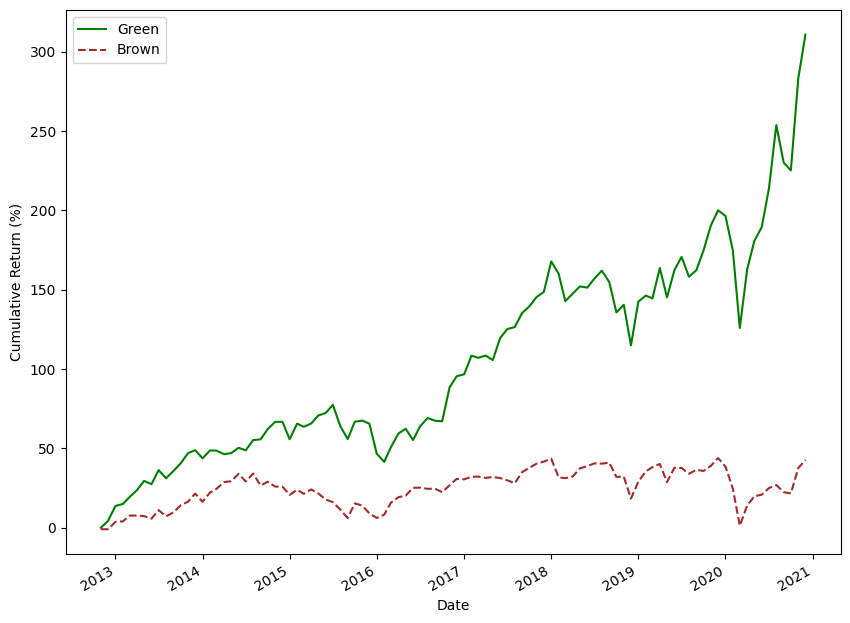

In [500]:
# Plot
plt.figure(figsize=(10,8))
RET_df['Cumulative_Green_Return'].plot(label='Green', color='green')
RET_df['Cumulative_Brown_Return'].plot(label='Brown', color='brown', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')

plt.legend()
plt.show()


## Q3. What is the monthly return and Sharpe ratio of the green minus brown portfolio?

In [422]:
RET_df['GMB'] = RET_df['Green_Return']-RET_df['Brown_Return']
GMB_RET = RET_df['GMB'].mean()
GMB_Sharpe = GMB_RET/RET_df['GMB'].std()

print(f'monthly Return of the green minus brown portfolio: {GMB_RET.round(3)}%')
print(f'sharpe ratio of the green minus brown portfolio: {GMB_Sharpe.round(3)}')

monthly Return of the green minus brown portfolio: 1.131%
sharpe ratio of the green minus brown portfolio: 0.334



## Q4. How does P ́astor et al. (2022) explain that green stocks outperform bad stocks when the theoretical model from P ́astor et al. (2021) suggests that brown stocks should outperform? Make sure to focus on the distinction between expected and realized returns.

Pástor et al. (2021) theorized that green stocks should have lower expected returns because investors prefer them for their environmentally friendly nature and they are less risky in terms of climate change. However, Pástor et al. (2022) found that in recent years, green stocks have actually outperformed brown ones.

The reason for this discrepancy? Unexpected shifts in demand.

Two key factors drove this unexpected performance:

Investors wanted more green stocks: As climate awareness grew, investors piled into green stocks, driving their prices up.
Consumers preferred green products: Companies with green products saw increased sales, which boosted their stock prices.
However, this past outperformance doesn't guarantee future success for green stocks. The boost they received was due to unforeseen increases in environmental concerns. Without these unexpected events, green might have even lagged behind brown stocks.

In short, while green stocks have recently outshone brown stocks due to unexpected demand shifts, their future performance is uncertain. Past performance isn't always indicative of future results.

## Part 2: Climate Risk

In [118]:
df2 = pd.read_csv('49_Industry_Portfolios.CSV', skiprows=11) 

def process_table(data):
    data = data.rename(columns ={'Unnamed: 0':'Date'})
    data.set_index('Date', inplace=True)
    for col in data.columns:
        data[col] = data[col].astype(float)
    data = data.replace([-99.99, -999], float('nan')) 
    return data

avg_value_weighted_return_M = process_table(df2.iloc[:1154])
avg_equal_weighted_return_M = process_table(df2.iloc[1157:2310])

avg_value_weighted_return_Y = process_table(df2.iloc[2313:2407])
avg_equal_weighted_return_Y = process_table(df2.iloc[2411:2504])

num_of_firms_in_port = process_table(df2.iloc[2507:3660])
avg_firm_size = process_table(df2.iloc[3663:4816])
sum_of_BE_over_sum_of_ME = process_table(df2.iloc[4819:4915])
value_weighted_average_of_BE_over_ME = process_table(df2.iloc[4918:5014])


In [119]:
avg_value_weighted_return_M 

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
192607,2.37,0.12,NaN,-5.19,1.29,8.65,2.50,50.21,-0.48,8.08,...,7.70,1.92,-23.79,0.07,1.87,4.61,-0.54,2.89,-5.77,5.20
192608,2.23,2.68,NaN,27.03,6.50,16.81,-0.76,42.98,-3.58,-2.51,...,-2.38,4.85,5.39,-0.75,-0.13,11.83,2.57,5.30,0.32,6.76
192609,-0.57,1.58,NaN,4.02,1.26,8.33,6.42,-4.91,0.73,-0.51,...,-5.54,0.08,-7.87,0.25,-0.56,-1.75,0.72,-3.06,-4.81,-3.86
192610,-0.46,-3.68,NaN,-3.31,1.06,-1.40,-5.09,5.37,-4.68,0.12,...,-5.08,-2.62,-15.38,-2.20,-4.11,-11.82,-4.28,-5.74,-0.94,-8.49
192611,6.75,6.26,NaN,7.29,4.55,0.00,1.82,-6.40,-0.54,1.87,...,3.84,1.61,4.67,6.52,4.33,-2.97,3.58,2.21,5.13,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202204,-0.14,2.60,4.22,3.03,6.37,-13.74,-27.84,-10.86,2.04,-7.00,...,-3.93,-10.93,-2.14,-11.41,-5.47,-8.53,-3.35,-11.55,-12.68,-7.79
202205,7.29,-3.26,-0.22,-1.60,2.67,-0.85,-3.50,-6.95,-5.12,-6.45,...,-4.57,-4.59,1.03,-5.64,-3.29,3.41,1.14,-2.34,3.95,-1.44
202206,-12.45,-1.91,0.46,-0.02,-11.63,-12.96,-10.87,-12.37,-2.56,-12.00,...,-8.44,-7.14,-6.43,-8.50,-9.02,-12.39,-2.05,-13.60,-9.79,-12.67


## Q1

In [146]:
sample_return_scaled  = avg_value_weighted_return_M .loc['200401':'201806']/100
sample_cum_return = (1 + sample_return_scaled ).cumprod() - 1
sample_cum_return = sample_cum_return.iloc[-1] * 100

In [147]:
sample_cum_return.sort_values()

Coal     -44.951705
Gold     -23.701326
Books     25.889188
Autos     59.256541
PerSv     64.609630
Banks     74.688543
RlEst     81.749251
Toys      85.382936
Other     86.173508
Steel     90.572898
Cnstr     99.415935
Hshld    160.787960
Fin      172.527542
FabPr    173.367854
ElcEq    174.752782
Paper    186.135745
Hlth     194.697290
Insur    218.571877
Telcm    220.541390
BldMt    244.007387
Chips    250.581256
Hardw    254.471884
Mines    259.485052
Oil      260.859873
Food     262.405587
Whlsl    263.080817
Agric    270.952096
Drugs    272.547502
Txtls    283.642273
Util     297.294911
Beer     299.232698
BusSv    337.475636
Mach     340.051406
Rubbr    344.975294
Trans    346.902560
Rtail    356.029714
MedEq    369.939741
Soda     383.955126
Chems    400.318159
Softw    403.642359
Boxes    410.182496
LabEq    432.937007
Fun      465.810559
Clths    484.807632
Meals    548.864698
Aero     570.642298
Smoke    620.694241
Guns     669.698673
Ships    918.909791
Name: 201806, dtype:

    Ans:
**Based on cumulative returns for the given period, the three highest performing industries are:**

Ships with a return of 918.91%,
Guns with a return of 669.70%, and
Smoke with a return of 620.69%.
Conversely, the industries that underperformed or had the least growth are:

Coal, which experienced a decline of 44.95%,
Gold, which decreased by 23.70%, and
Books, which, though positive, had the lowest growth among the positive returns at 25.89%.

## Q2

In [395]:
sample_avg_return = avg_value_weighted_return_M .loc['200401':'201806'].mean()
sample_return_std = avg_value_weighted_return_M .loc['200401':'201806'].std()
res = pd.concat([sample_avg_return, sample_return_std], axis=1)
res.columns = ['cum ret','std']
res['sharpe ratio'] = res['cum ret']/res['std']

In [397]:
res.sort_values('sharpe ratio')

,cum ret,std,sharpe ratio
Gold,0.406322,10.661723,0.038110
Coal,0.528851,12.931512,0.040896
Books,0.315690,6.087525,0.051858
Autos,0.580575,7.972130,0.072826
PerSv,0.461322,5.906168,0.078108
RlEst,0.712529,8.758192,0.081356
Banks,0.515575,6.129446,0.084114
Steel,0.745402,8.516738,0.087522
Toys,0.544713,6.156516,0.088477
Cnstr,0.634368,6.845790,0.092665


    Ans:
**Three Highest Sharpe Ratios:**

Meals: 0.288
Guns: 0.258
Smoke: 0.257

**Three Lowest Sharpe Ratios:**

Gold: 0.038
Coal: 0.041
Books: 0.052

**Comparing these with the highest and lowest returns:**

Highest returns are 

Smoke    620.694241
Guns     669.698673
Ships    918.909791

Lowest returns are

Coal     -44.951705
Gold     -23.701326
Books     25.889188

The industries with the highest Sharpe ratios are Meals, Guns, and Smoke. Guns and Smoke are also among the top three industries for raw returns, suggesting they offer both high risk-adjusted returns and strong absolute performance. Conversely, while Gold, Coal, and Books have the lowest Sharpe ratios, Coal and Gold also exhibit negative raw returns, indicating underperformance in both risk-adjusted and absolute terms.

## Q3

### (a)

    i. Ans:
**February 2007:**

Intergovernmental Panel on Climate Change (IPCC) Report: One of the most significant climate-related events in February 2007 was the release of the IPCC's Fourth Assessment Report. On February 2nd, the IPCC confirmed with more than 90% certainty that the observed increase in global average temperatures since the mid-20th century was very likely due to the observed increase in anthropogenic greenhouse gas concentrations. This report drew extensive media attention and solidified the consensus on human-caused global warming.

Weather Anomalies: The beginning of 2007 saw several weather-related anomalies. January 2007 was the warmest first month on record globally. These unusual weather patterns could have spurred public interest and driven people to search more about climate change.

**April 2007:**

England's Warmest April: England experienced its warmest April in 348 years of record-keeping, breaking the previous record set in 1865 by a significant margin. Such unusual and record-breaking weather events usually draw public attention and could lead to increased searches about climate change.

Al Gore & "An Inconvenient Truth": By 2007, Al Gore's documentary "An Inconvenient Truth" had gained significant traction. His active campaigning on the issue, coupled with the documentary's critical acclaim, meant that public awareness and interest in climate change were high. Given that he and the IPCC were awarded the Nobel Peace Prize later in the same year, it's reasonable to assume that there was already significant buzz around their work by April.

Arctic Ice Melting Reports: There were increasing reports about the Arctic warming at an unprecedented rate. News about the Arctic is often a catalyst for broader discussions about global climate change.

**December 2009:**

Copenhagen Climate Conference: December 2009 hosted the significant UN Climate Change Conference, COP15, in Copenhagen. The event drew global attention and resulted in the "Copenhagen Accord," acknowledging the need to address global temperature rises and committing funding to developing nations.

ClimateGate Controversy: A leak of emails from the Climatic Research Unit stirred media buzz, with claims (later debunked) of manipulated data exaggerating global warming.

Arctic Ice Concerns: The year saw one of the lowest Arctic sea ice extents on record, underscoring the tangible effects of global warming.

U.S. EPA Decision: The EPA declared that greenhouse gases posed a threat to public health, paving the way for regulating emissions under the Clean Air Act.



    ii

In [206]:
climate_trend = pd.read_csv('multiTimeline_Climate_Trend.csv', skiprows=2)
climate_trend['Month'] = pd.to_datetime(climate_trend['Month'], format='%Y-%m')
climate_trend.rename(columns={'Month': 'Date'}, inplace=True)

In [207]:
climate_trend

,Month,Climate change: (United States)
0,2004-01,10
1,2004-02,14
2,2004-03,12
3,2004-04,13
4,2004-05,14
...,...,...
232,2023-05,14
233,2023-06,8
234,2023-07,9
235,2023-08,9


In [202]:
sample_return = avg_value_weighted_return_M .loc['200401':'201806'].reset_index()
sample_return['Date'] = sample_return['Date'].astype(str)
sample_return['Date'] = pd.to_datetime(sample_return['Date'], format='%Y%m')

In [204]:
sample_return

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,...,-1.09,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87
1,2004-02-01,2.10,6.15,5.79,2.59,3.82,3.42,0.81,1.06,2.99,...,6.51,0.07,2.26,6.75,7.11,2.16,4.21,2.32,2.94,-2.08
2,2004-03-01,4.05,0.74,4.01,-0.21,-4.03,-3.63,2.27,-0.22,1.56,...,-0.12,-0.54,2.18,-0.13,0.76,-0.38,-0.63,1.49,-2.16,-5.01
3,2004-04-01,-0.21,3.05,4.66,0.38,1.91,-5.81,-1.81,0.04,2.22,...,-2.34,0.21,0.91,-3.21,-0.83,-5.54,-0.78,-6.85,-7.77,-1.83
4,2004-05-01,1.21,-2.49,2.13,2.25,-12.61,2.89,0.46,0.37,1.52,...,4.96,2.18,0.16,0.71,-3.03,2.54,0.90,2.47,0.60,3.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2018-02-01,1.20,-6.77,-8.39,-6.76,-6.62,0.70,1.12,-3.50,-6.27,...,-3.76,-6.66,-5.41,-4.72,-4.11,-2.13,-4.44,-3.71,-1.26,-4.72
170,2018-03-01,-4.92,-2.25,-0.41,1.27,-1.65,-9.23,0.52,-0.19,2.13,...,-1.54,0.53,-1.04,-3.25,-0.41,-4.62,-2.13,4.55,-1.35,-3.56
171,2018-04-01,7.99,-3.51,-0.79,-4.29,-14.16,6.42,3.09,-0.46,-5.35,...,-1.39,0.49,0.82,4.29,3.53,1.11,3.52,-1.29,-1.57,-1.75
172,2018-05-01,1.93,-0.86,-1.30,-1.19,-1.87,0.81,9.61,0.70,-0.25,...,-3.09,4.85,1.56,1.37,-1.75,1.08,-1.11,-3.64,0.37,-0.47


In [228]:
def industry_regression(sample_return, factor_df, factor):
    # Merge the dataframes
    merged_df = pd.merge(sample_return, factor_df, on='Date', how='inner')

    industries = sample_return.columns.drop(['Date'])
    results = []

    # Run regressions for each industry
    for industry in industries:
        Y = merged_df[industry]
        X = merged_df[factor]
        X = sm.add_constant(X)  # Add constant for OLS regression

        model = sm.OLS(Y, X, missing='drop').fit()

        coefficient = model.params[factor]
        p_value = model.pvalues[factor]

        results.append([industry, coefficient, p_value])

    # Create results dataframe
    trend_df = pd.DataFrame(results, columns=['Industry', 'Coefficient', 'P-Value'])
    
    return trend_df

# Usage:
factor = 'Climate change: (United States)'
climate_trend_df = industry_regression(sample_return, climate_trend, factor)


In [209]:
climate_trend_df.sort_values('Coefficient')

,Industry,Coefficient,P-Value
6,Fun,-0.088852,0.205598
44,Banks,-0.069811,0.194354
48,Other,-0.056930,0.243218
7,Books,-0.043041,0.421145
45,Insur,-0.041463,0.373496
17,Cnstr,-0.035283,0.557783
8,Hshld,-0.032415,0.315205
25,Guns,-0.030119,0.501632
12,Drugs,-0.029972,0.377967
11,MedEq,-0.027710,0.490387


    iii. Ans:

The regression results provide fascinating insights. At the forefront, the coal industry stands out with its robust positive coefficient, which indicates a pronounced relationship with climate change concerns. What's more, the p-value for coal is notably below the conventional 0.05 threshold, adding statistical confidence to this observation.

While the agriculture sector does show a positive correlation, contrary to some expectations, it does not rank highest. This suggests that while agriculture might be impacted by climate change concerns, other industries, like coal, are more directly associated.

On the negative side of the spectrum, industries such as "Fun" (presumably funds or entertainment), banks, and insurance have negative coefficients. The negative value for insurance intuitively aligns with the presumption that as concerns about climate change intensify, potential risks and liabilities for insurers might escalate. Similarly, the negative trend in banks could indicate shifts in lending or investment priorities due to heightened climate change awareness.

However, a critical observation is the p-values associated with these coefficients. Many industries, even those with more pronounced coefficients, have p-values that exceed the conventional 0.05 significance level. This calls for caution when interpreting the results. For instance, while the agriculture industry has a positive coefficient, its p-value is above 0.05, indicating that its relationship might not be statistically significant.

In summary, the results provide a nuanced perspective on how different industries might respond to escalating climate change concerns. While certain trends are evident, the statistical significance of many of these relationships remains uncertain, urging a careful and considered interpretation.


    iv.

    1. Physical Risk: Drought

3 Peaks

**October 2007:**

Australia's "Millennium Drought": By 2007, Australia was deep into one of the most prolonged and severe droughts it had ever experienced, often referred to as the "Millennium Drought". October marked a time when the drought's effects were especially severe, impacting both urban areas and agriculture.

Southern U.S. Drought: States like Georgia and Alabama were facing severe drought conditions, with Georgia's Governor declaring a state of emergency in 85 counties.

**July 2012:**

U.S. Midwest Drought: The U.S. experienced one of its most extensive droughts with over 60% of the lower 48 states facing some form of drought. July was particularly hard-hit, with crops being severely affected, leading to spikes in food prices and concerns over food security.

India's Late Monsoon: India, reliant on its monsoon for agriculture, experienced a delayed monsoon in 2012. By July, there were increasing concerns about drought in many parts of the country.

**April 2015:**

California's Historic Drought: California was in the midst of one of its worst droughts on record. By April 2015, Governor Jerry Brown mandated a 25% reduction in urban water use, marking the state's first-ever mandatory water restrictions.

Sao Paulo Water Crisis: Brazil's most populous city, Sao Paulo, was grappling with its worst drought in decades, with reservoirs reaching critically low levels and water rationing becoming a common occurrence.

East Africa Dry Spell: Countries like Kenya, Ethiopia, and Somalia were experiencing a prolonged dry spell, impacting food and water availability and leading to concerns about famine in some areas.


In [192]:
drought = pd.read_csv('multiTimeline_Drought.csv', skiprows=2)
drought['Month'] = pd.to_datetime(drought['Month'], format='%Y-%m')
drought.rename(columns={'Month': 'Date'}, inplace=True)


In [200]:
drought

,Month,Drought: (United States)
0,2004-01,16
1,2004-02,19
2,2004-03,24
3,2004-04,27
4,2004-05,30
...,...,...
232,2023-05,45
233,2023-06,49
234,2023-07,34
235,2023-08,42


In [210]:
factor = 'Drought: (United States)'
drought_df = industry_regression(sample_return, drought, factor)

In [215]:
drought_df.sort_values('Coefficient')

,Industry,Coefficient,P-Value
28,Coal,-0.109186,0.113227
46,RlEst,-0.068214,0.144228
6,Fun,-0.050256,0.239273
19,FabPr,-0.049752,0.245389
14,Rubbr,-0.047831,0.128358
24,Ships,-0.044607,0.271265
7,Books,-0.041616,0.200271
29,Oil,-0.040568,0.190187
23,Aero,-0.040536,0.148821
32,PerSv,-0.037615,0.232951


Ranking Discussion:

Drought:
Top 3 negatively impacted industries (based on Coefficient) under the influence of drought:

Coal
RlEst
Fun
These industries showcase the highest negative coefficients, which might indicate that they are most negatively influenced by drought conditions. However, it's crucial to note the p-values associated with each. For instance, while Coal has the highest negative coefficient, its p-value of 0.113227 is above the standard 0.05 threshold, suggesting caution in inferring a significant relationship.

Least 3 negatively impacted industries (or those that might be positively impacted or least affected) under the influence of drought:

Gold
Smoke
Agric
Although these industries have positive or minimal negative coefficients, suggesting a potential positive relationship or limited impact from drought, the associated p-values indicate that these relationships may not be statistically significant. For example, Gold, which has the highest positive coefficient, has a p-value of 0.539234, indicating that its correlation might not be strong.

Conclusion:

The disparities in how industries react to drought versus climate change underscore the intricacies of these environmental concerns. Drought, with its direct implications on water availability, can have immediate effects on industries reliant on water resources. In contrast, climate change might exert more diffuse, long-term influences shaped by policy changes, societal awareness, and market dynamics.

Furthermore, it's essential to acknowledge the geographical dimension to these impacts. An industry's reaction to drought in one region might differ dramatically from its response in another, owing to regional climatic, economic, and social differences. While the presented data offers an overarching perspective, diving deeper with a more detailed analysis—factoring in regional variations, specific industry segments, and other external determinants—would yield a more comprehensive understanding.

Moreover, the importance of considering the p-values in these regressions can't be overstated. They indicate the level of confidence we can have in these relationships, and many of the observed relationships in this data set don't meet the typical 0.05 threshold for statistical significance.

    2. Transition Risk: Carbon Tax

3 Peaks

**November 2012:**

U.S. Presidential Election: The 2012 U.S. presidential election took place in November. While carbon tax was not a central issue, there was growing discussion around climate change policies and potential solutions like a carbon tax.

Hurricane Sandy: In late October 2012, the U.S. East Coast was hit by Hurricane Sandy, one of the deadliest and costliest hurricanes in U.S. history. The aftermath led to increased discussions on climate change and potential policy solutions, including a carbon tax.


**Feburary 2016:**

Carbon Pricing Leadership Coalition: In early 2016, the World Bank's Carbon Pricing Leadership Coalition gained momentum, and several countries and companies showed interest in joining. Discussions around carbon pricing mechanisms, including carbon taxes, became more prominent in international media.

U.S. Presidential Primaries: The U.S. presidential primaries were in full swing in February 2016. Some candidates, especially on the Democratic side, were vocal about climate change and mentioned mechanisms like a carbon tax as a potential solution.


**November 2016:**

U.S. Presidential Election: The 2016 U.S. presidential election saw significant debate around climate change and environmental policies. The potential for a carbon tax was discussed as a means to combat climate change.

Carbon Tax Proposals: Around this time, certain jurisdictions globally were discussing or implementing carbon pricing mechanisms. For instance, in Canada, the federal government was working on a plan to impose a national carbon price.

International Climate Agreements: The Paris Agreement was in the news during this period, with countries beginning to ratify it in late 2016. As countries looked for ways to meet their commitments, mechanisms like carbon taxes were often in the discussion.



In [193]:
carbon_tax = pd.read_csv('multiTimeline_Carbon_Tax.csv', skiprows=2)
carbon_tax['Month'] = pd.to_datetime(carbon_tax['Month'], format='%Y-%m')
carbon_tax.rename(columns={'Month': 'Date'}, inplace=True)

In [212]:
carbon_tax

,Month,Carbon tax: (United States)
0,2004-01,0
1,2004-02,0
2,2004-03,0
3,2004-04,6
4,2004-05,6
...,...,...
232,2023-05,17
233,2023-06,12
234,2023-07,13
235,2023-08,14


In [213]:
factor = 'Carbon tax: (United States)'
carbon_tax_df = industry_regression(sample_return, carbon_tax, factor)

In [216]:
carbon_tax_df.sort_values('Coefficient')

,Industry,Coefficient,P-Value
44,Banks,-0.036333,0.330254
29,Oil,-0.035068,0.320835
6,Fun,-0.024892,0.609574
17,Cnstr,-0.024068,0.563987
47,Fin,-0.022574,0.557810
25,Guns,-0.020940,0.500262
46,RlEst,-0.020870,0.695847
45,Insur,-0.019602,0.544017
8,Hshld,-0.019399,0.385924
12,Drugs,-0.018604,0.429809


Carbon Tax:

The industries most negatively influenced by the carbon tax are Banks, Oil, and Fun (possibly standing for Funds). These industries have the highest negative coefficients, suggesting that they may experience significant declines in returns or value if a carbon tax is imposed. Notably, their associated p-values, all being above 0.05, imply that these results might lack statistical significance.

Gold, FabPr, Coal, and Autos exhibit positive coefficients, hinting that they may either benefit or face less severe negative consequences due to the carbon tax. This outcome is particularly intriguing for Coal and Autos, conventionally viewed as carbon-intensive sectors. Yet, the relatively high p-values linked with these sectors cast doubts on the results' statistical reliability.

Highlighting Agriculture (Agric), it exhibits an almost negligible negative coefficient, combined with a p-value nearing 1. This suggests that agriculture might either be scarcely impacted by the transition risk linked with a carbon tax or that the observed effect isn't statistically compelling.

In the broader picture, many industries in this dataset possess p-values exceeding 0.05, questioning the statistical significance of the observed coefficients. In standard practice, a p-value below 0.05 is typically considered to highlight that the coefficient is meaningfully different from zero. This dataset, however, doesn't present numerous coefficients where this can be asserted with confidence.

Comparison to Previous Results:

Coal Industry: Coal displayed a negative influence under drought conditions but reflected a positive impact concerning carbon tax. This might suggest that while environmental adversities could negatively impact the coal sector, transition risks such as carbon taxes might be less detrimental. Alternatively, some factors in the transition could even be advantageous for the industry.

Funds (Fun): This industry seemingly remains vulnerable to a range of external factors: drought, climate change, and now the carbon tax. It portrays an industry sensitive to diverse external perturbations.

Agriculture (Agric): Consistent with previous observations, Agriculture appears to be resilient, enduring minor negative influences across varying external factors.

Conclusion:

The implications of a carbon tax bring forth a distinct set of industry responses when compared to environmental factors like drought and climate change. Interestingly, certain sectors traditionally viewed as susceptible to a carbon tax, such as Coal, seem to potentially benefit from it. The overarching high p-values, however, imply caution when interpreting these findings.

Further insights could be garnered by examining the methodologies and data sources behind the regression, providing clarity on the underpinnings of these outcomes. Transition risks, interwoven with overarching economic, technological, and societal transitions, present a complex landscape, making predictions inherently challenging.

### (b)

In [225]:
SSRN = pd.read_excel('Sentometrics_US_Media_Climate_Change_Index.xlsx', skiprows=6, sheet_name=5)

In [227]:
SSRN['Date'] = pd.to_datetime(SSRN['Date'], format='%Y-%m')

In [229]:
SSRN

,Date,Aggregate,cluster_Business Impact,cluster_Environmental Impact,cluster_Societal Debate,cluster_Research,Agreements/Actions,Agriculture Shifts,Airline Industry,Arctic Wildlife,...,Hurricanes/Floods,Legal Actions,Marine Wildlife,Political Campaign,Renewable Energy,Scientific Studies,Social Events,Tourism,UN/IPCC Reports,Water/Drought
0,2003-01-01,0.670882,0.724689,0.634144,0.522989,0.540001,0.723770,0.579213,0.617377,0.473769,...,0.219000,0.735931,0.281948,0.527560,0.355534,0.531972,0.443459,0.492221,0.440955,0.604657
1,2003-02-01,0.599651,0.681383,0.575126,0.358989,0.517911,0.711091,0.227526,0.492892,0.281511,...,0.773497,0.870956,0.508305,0.260103,0.483923,0.496471,0.418194,0.468274,0.432443,0.466395
2,2003-03-01,0.405426,0.374329,0.454074,0.402151,0.322407,0.281523,0.263173,0.316483,0.129596,...,0.241296,0.358616,0.295517,0.479183,0.543054,0.460373,0.324775,0.304384,0.262541,0.600739
3,2003-04-01,0.438446,0.436445,0.328511,0.457464,0.335117,0.355389,0.235146,0.655663,0.118261,...,0.157286,0.535568,0.220386,0.593473,0.379494,0.474708,0.385128,0.308005,0.268713,0.409758
4,2003-05-01,0.375706,0.414676,0.294991,0.344434,0.262923,0.469369,0.314070,0.381374,0.068508,...,0.258719,0.373385,0.274674,0.416606,0.395942,0.301688,0.278360,0.246417,0.168202,0.305166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2022-04-01,2.294735,2.090171,2.192912,2.254390,1.869449,1.611592,1.935144,3.418276,1.491987,...,1.717186,1.758399,2.724441,1.989125,2.519250,1.846792,2.371180,1.831782,1.804638,2.234982
232,2022-05-01,2.017803,1.566174,2.342731,1.936339,1.374451,1.126491,2.126119,2.205561,0.682716,...,2.146513,1.591640,1.843062,1.894994,2.116029,1.537309,2.031130,1.873078,1.275871,2.084220
233,2022-06-01,1.766793,1.534178,1.924679,1.734123,1.374984,1.135386,1.585354,1.314603,1.831432,...,1.637189,1.822138,1.249268,1.640087,2.329815,1.456547,1.818080,1.500555,1.363648,2.025642
234,2022-07-01,2.092065,1.769291,2.316253,1.977382,1.422136,1.172352,1.624692,1.787659,0.851094,...,2.169036,2.222788,0.943217,1.840315,1.808870,1.517883,2.133992,2.170820,1.205322,2.172966


In [230]:
factor = 'Aggregate'
SSRN_Agg_df = industry_regression(sample_return, SSRN, factor)

In [231]:
SSRN_Agg_df

,Industry,Coefficient,P-Value
0,Agric,1.991740,0.177603
1,Food,-0.041114,0.957039
2,Soda,0.788615,0.539878
3,Beer,1.005327,0.203643
4,Smoke,-0.781538,0.480971
5,Toys,0.121200,0.931118
6,Fun,0.793441,0.663045
7,Books,1.844820,0.182184
8,Hshld,0.274569,0.742770
9,Clths,0.419246,0.746908


**Compare SSRN Aggregate factor with Climate Change factor from Google Trend:**


When comparing the regression results of Google Trends on climate change against stock returns with the results from the SSRN aggregated climate change factors against the same portfolio of stock returns, there are some noteworthy observations:

Coefficient Comparison:

In the Climate Change (Google Trend) data, the "Fun" industry displays the highest negative coefficient, suggesting a strong negative relationship, whereas the "Coal" industry shows the highest positive coefficient.
Contrasting this with the SSRN_Agg data, "Smoke" represents the highest negative coefficient, while "Autos" has the highest positive coefficient.
The ranking of industries from the most negative to the most positive coefficient shows differences between the two datasets, meaning the industries that are most negatively or positively affected in one dataset don't necessarily hold the same position in the other.
P-Value Examination:

Typically, a p-value below 0.05 is deemed statistically significant.
For the Climate Change data, only the "Coal" industry is significant at this level.
In the SSRN_Agg dataset, "MedEq" stands out as the only industry that's statistically significant just below the 0.05 threshold.
This shows a variation in which industries are statistically significant between the two datasets.
Overall:
The comparison of coefficients and p-values across the two datasets highlights that there's variability in the rankings of industries based on their relationship (either positive or negative) with climate change awareness and their statistical significance. This could suggest that the source or methodology of each dataset influences the perceived impact of climate change awareness on different industries.

In [236]:
factor = 'Water/Drought'
SSRN_drought_df = industry_regression(sample_return, SSRN, factor)

In [233]:
SSRN_drought_df

,Industry,Coefficient,P-Value
0,Agric,3.436771,0.015435
1,Food,-0.123028,0.867489
2,Soda,-0.335171,0.787513
3,Beer,0.842883,0.270230
4,Smoke,-0.929216,0.385618
5,Toys,-0.397365,0.769246
6,Fun,1.418841,0.419672
7,Books,1.220410,0.361670
8,Hshld,0.103388,0.898236
9,Clths,0.010200,0.993517


**Compare SSRN Water/Drought factor with Drought factor from Google Trend:**

Upon analyzing the regression results for the "Drought" factor against stock returns, derived from Google Trends and SSRN datasets, we observe the following:

Coefficient Comparison:

Google Trends Dataset (Drought): The "Coal" industry showcases the highest negative coefficient, suggesting that an increase in drought concerns from this data source negatively affects this industry the most. Conversely, the "Gold" industry displays the highest positive coefficient.
SSRN Dataset (SSN_Drought): Here, the "Smoke" industry possesses the most pronounced negative coefficient, while "Agric" emerges with the highest positive coefficient.
Evidently, the industries most affected (either positively or negatively) by drought concerns aren't consistently ranked between the two datasets.
P-Value Examination:

In scientific research, a p-value less than 0.05 generally indicates statistical significance.
From the Google Trends data on drought, the "Coal" industry is the closest to this threshold, suggesting a trend towards significance.
Within the SSRN Dataset, "Agric" stands out with a p-value just over 0.015, marking it as statistically significant at the 5% level.
Ranking Similarity:
When examining the overall ranking based on coefficients, the two datasets display considerable variation in how industries are ranked in terms of sensitivity to drought concerns. Few industries consistently appear towards the top or bottom in both datasets, suggesting that while there may be underlying themes, the exact quantification of impact varies based on data source.

Broad Perspective:
There exists variability between the datasets concerning which industries are most influenced by the drought factor. Such a discrepancy underlines that data sources and methodologies can shape the perceived impact of drought awareness on different sectors. This information is crucial for stakeholders to make informed decisions, considering the weight and reliability of the data source.

In [235]:
factor = 'Carbon Tax'
SSRN_carbon_tax_df = industry_regression(sample_return, SSRN, factor)

In [237]:
SSRN_carbon_tax_df

,Industry,Coefficient,P-Value
0,Agric,0.781232,0.634136
1,Food,0.554557,0.511917
2,Soda,0.366976,0.797021
3,Beer,1.328799,0.129205
4,Smoke,-0.492190,0.689033
5,Toys,1.196655,0.440987
6,Fun,-0.145782,0.942446
7,Books,1.298431,0.397728
8,Hshld,0.209564,0.821248
9,Clths,0.467590,0.745419


**Compare SSRN Carbon Tax factor with Carbon Tax factor from Google Trend:**

Upon reviewing the regression results for the "Carbon_tax" factor against stock returns, derived from Google Trends and the SSRN datasets, the following patterns emerge:

Coefficient Comparison:

Google Trends Dataset (Carbon_tax): The "Banks" and "Oil" industries both possess the highest negative coefficients. This implies that heightened concerns about carbon taxes (as indicated by search trends) tend to negatively affect these industries the most. In contrast, the "Gold" and "FabPr" industries demonstrate the most substantial positive coefficients.

SSRN Dataset (SSN_Carbon_Tax): The "Coal" and "Cnstr" industries exhibit the highest negative coefficients, suggesting that increased concerns about carbon taxes sourced from SSRN impact these sectors the most. The "Txtls" and "Autos" industries, conversely, present the strongest positive coefficients.

It's notable that the industries affected most markedly (be it positively or negatively) by carbon tax concerns are not consistent between the two datasets.

P-Value Examination:

A p-value below 0.05 is commonly used to determine statistical significance.

From the Google Trends dataset, "FabPr" approaches this threshold, hinting at potential statistical significance.

In the SSRN Dataset, "Beer" and "MedEq" come close to this benchmark. Notably, "Txtls" from the SSRN dataset is statistically significant, with a p-value just above 0.15.

Ranking Similarity:
A holistic view of the rankings based on coefficients reveals considerable disparities between the datasets. The two sources differ on which industries are most impacted by carbon tax concerns. Only a handful of industries maintain a similar position in both datasets' rankings, illustrating that the exact quantification of impact is contingent upon the data source.

Broad Perspective:
There's clear variability between the datasets in terms of which industries are most influenced by carbon tax concerns. This disparity accentuates the influence of data source and methodologies on perceptions of how carbon tax awareness affects different sectors. This differential is essential for stakeholders, as they need to weigh the significance and reliability of each data source when making informed decisions.

**Overall Comparison**

Based on the three sets of regression analyses comparing Google Trends and SSRN datasets for various environmental concerns against stock returns, we can draw the following general observations:

Variability in Coefficient Magnitudes:

The two datasets, Google Trends and SSRN, often show variations in the magnitude and direction of coefficients for the same industries. This underscores that the impact of environmental concerns on stock returns can be perceived differently depending on the data source or methodology.
P-Value Distributions:

P-values, which indicate the statistical significance of coefficients, vary between the two datasets. While certain industries may appear significant in one dataset, they might not be in the other. This suggests that while the concerns (like climate change or carbon tax) are universally acknowledged, their quantified effects on specific industries might be more nuanced and context-dependent.
Ranking Disparities:

There's a clear distinction in the rankings of industries based on the coefficients across the two datasets. Few industries maintain consistent rankings, illustrating the importance of cross-referencing multiple sources when trying to understand the impact of external concerns on stock returns.
Source Characteristics:

Google Trends captures real-time interest from the broader public, potentially reflecting immediate sentiments and concerns. In contrast, SSRN, an academic repository, might reflect more studied and deliberate perspectives. This could explain the differences, as public sentiment can be volatile, while academic views might be based on more extended historical data or detailed analyses.
Broad Implications:

For stakeholders and decision-makers, the disparity between the two datasets emphasizes the need for a comprehensive approach. Relying on a single data source might lead to skewed perceptions. A holistic analysis that considers multiple datasets and methodologies will yield a more rounded understanding.
Consistency in Certain Sectors:

Although there are discrepancies, some industries consistently show sensitivity (either positive or negative) to environmental concerns across both datasets. This implies that certain sectors might inherently be more susceptible to these external factors, regardless of the data source.
In summary, while both Google Trends and SSRN offer valuable insights into the relationship between environmental concerns and stock returns, they present different angles. This difference is likely due to the nature of the data they represent: immediate public sentiment versus academic perspectives. For a balanced view, it's crucial to consider multiple sources and recognize the inherent strengths and limitations of each.

In [240]:
# Align dataframes by index
all_dfs = [climate_trend_df, SSRN_Agg_df, drought_df, SSRN_drought_df, carbon_tax_df, SSRN_carbon_tax_df]
aligned_dfs = [df.set_index(climate_trend_df.index) for df in all_dfs]  # Assuming all dataframes should align to the index of climate_trend_df

# Concatenate side by side
result_df = pd.concat(aligned_dfs, axis=1)

In [242]:
with pd.ExcelWriter('climate_risk_output.xlsx') as writer:
    result_df.to_excel(writer, sheet_name='Comparison')